<h1>TIME SERIES ANALYSIS<h1>
<hr>

Time Series Analysis is the way of studying the characteristics of the response variable with respect to time.<br>
Time series analysis is a method of analyzing a collection of data points over a period of time. Instead of recording data points intermittently or randomly, time series analysts record data points at consistent intervals over a set period of time.<p>
A time series is nothing but a sequence of various data points that occurred in a successive order for a given period of time
<h2>Why Do We Need Time Series Analysis</h2>
Time series analysis has a range of applications in statistics, sales, economics, and many more areas. The common point is the technique used to model the data over a given period of time.

The reasons for doing time series analysis are as follows:
<ol>
<li>Features: Time series analysis can be used to track features like trend, seasonality, and variability.</li>
<li>Forecasting: Time series analysis can aid in the prediction of stock prices. It is used if you would like to know if the price will rise or fall and how much it will rise or fall.</li>
<li>Inferences: You can predict the value and draw inferences from data using Time series analysis.</li></ol>
<a href =https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/>Further Reading</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/GDP Per Capita.csv')
data.head()

,DATE,NGANGDPRPCPCPPPT
0,2004-01-01,7.651572
1,2005-01-01,4.276703
2,2006-01-01,3.975799
3,2007-01-01,4.529894
4,2008-01-01,4.395712


In [ ]:
data.DATE = pd.to_datetime(data['DATE'])

<hr>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/car_prices.csv')
data.head(3)

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN


In [ ]:
df = data.copy()

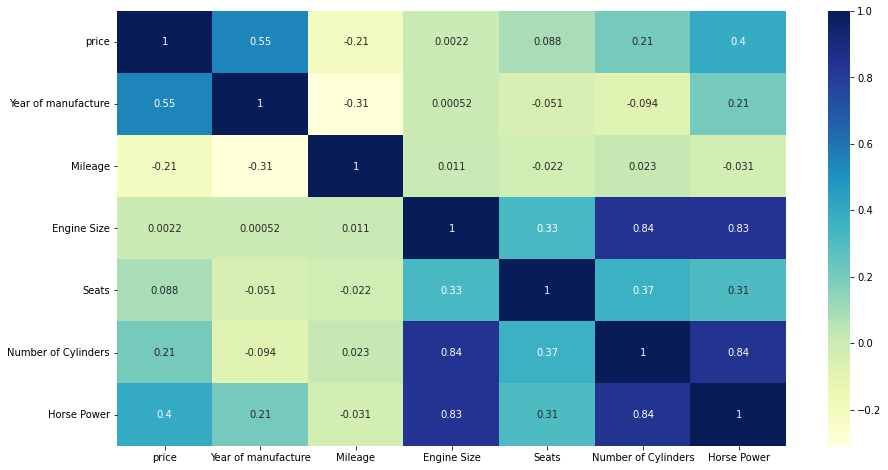

In [ ]:
# Show the correlation of datasets
# The rule of thumb is if tho columns in a dataset has a correlation of above 90%, we drop one of the columns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

,Year of manufacture,price
0,2011,16640000
1,2011,3432000
2,2011,10500000


Text(0.5, 1.0, '2011 TIME SERIES DATA')

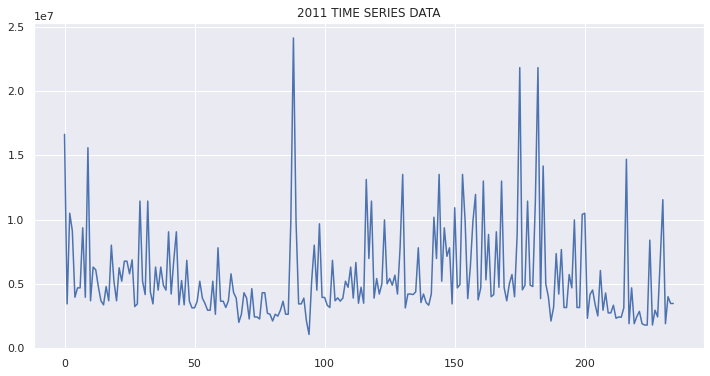

In [ ]:
year_2011 = df.loc[df['Year of manufacture'] == 2011] #......................... Select out year 2011 and save to it a new name
year_2011 = year_2011[['Year of manufacture', 'price']]#.... Select out th target and the date column because they are all you need for time series
year_2011.reset_index(drop = True, inplace = True) # ........................... Reset the index of the dataframe
display(year_2011.head(3))

# PLOT THE DATA
plt.figure(figsize = (12, 6))
sns.set(style = 'darkgrid')
plt.plot(year_2011['price'])
plt.title("2011 TIME SERIES DATA")

,Year of manufacture,price
0,2012,7592000
1,2012,9880000
2,2012,14560000


Text(0.5, 1.0, '2012 TIME SERIES DATA')

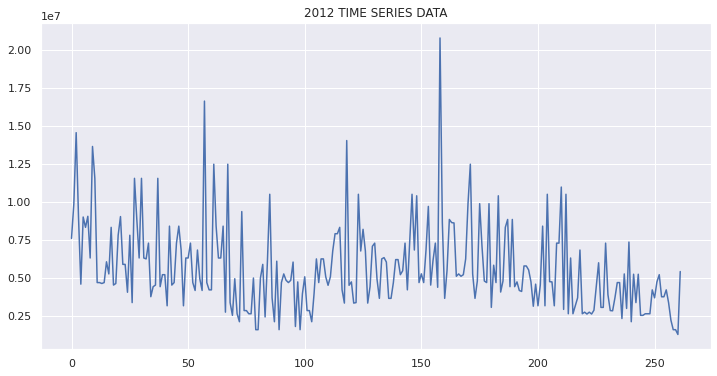

In [ ]:
year_2012 = df.loc[df['Year of manufacture'] == 2012] #......................... Select out year 2012 and save to it a new name
year_2012 = year_2012[['Year of manufacture', 'price']]#.... Select out th target and the date column because they are all you need for time series
year_2012.reset_index(drop = True, inplace = True) # ........................... Reset the index of the dataframe
display(year_2012.head(3))

# PLOT THE DATA
plt.figure(figsize = (12, 6))
plt.plot(year_2012['price'])
plt.title("2012 TIME SERIES DATA")

,Year of manufacture,price
0,2013,4160000
1,2013,7980000
2,2013,6300000


Text(0.5, 1.0, '2013 TIME SERIES DATA')

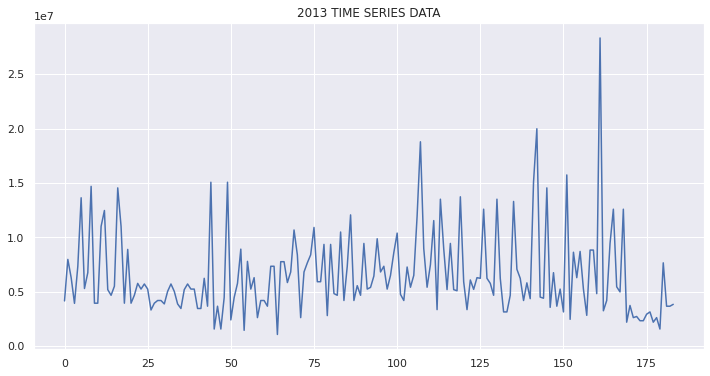

In [ ]:
year_2013 = df.loc[df['Year of manufacture'] == 2013] #......................... Select out year 2013 and save to it a new name
year_2013 = year_2013[['Year of manufacture', 'price']]#.... Select out the target and the date column because they are all you need for time series
year_2013.reset_index(drop = True, inplace = True) # ........................... Reset the index of the dataframe
display(year_2013.head(3))

# PLOT THE DATA
plt.figure(figsize = (12, 6))
plt.plot(year_2013['price'])
plt.title("2013 TIME SERIES DATA")

Visualy, the Datasets are all non-stationary because they have. We can further use statistical Augmented Dickey Fuller to ascertain if there is a unit root in the distribution or not. <br>
A Dataset with Unit Root = 1 means that the time series NON-Stationary<br><hr>

In Using Adfuller, we establish an hypothesis<br>
Null Hypothesis =  Ho, and Alternate Hypothesis = Ha<br>
<b>Ho: The time series is non-stationary<br></b>
<b>Ha: The time series is stationary<p></b>
The rule of thumb is that: 
<ul>
<li>If the P-Value is lesser than a chosen significant level (say 0.05), then we reject the null hypothesis and conclude that the time series is Stationary</li>
<li>If the P-Value is higher than the chosen significant level, then we accept the null hypothesis and conclude that the time series is Non-Stationary. Which also means it has a unit root of 1.
</ul>
OR<br>
<ul>
<li>If Test Statistic < Critical Values => Rejects the null hypothesis.</li>
<li>If Test Statistic >Critical Values => failed to reject the null hypothesis.</li>

<br>
<br>
<b>Extra Reading (<a href = "https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html">StatsModel Documentation</a>)

In [ ]:
%pip install numpy scipy patsy statsmodels --q
from statsmodels.tsa.stattools import adfuller # ............ Import the adfuller library that runs the stationary test
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
adfuller(year_2011['price'])

(-3.7758818587568954,
 0.003163941866462784,
 6,
 228,
 {'1%': -3.4593607492757554,
  '5%': -2.8743015807562924,
  '10%': -2.5735714042782396},
 7217.333147506865)

In [ ]:
# Create a function that tests for the stationarity of the dataset

def stationarity_finder(dataframe):
  result = adfuller(dataframe, regression = 'ct') #.............................. Save the result of the adfuller test in a variable called RESULT

  # Print the results of the adfuller stationary tests
  print('1. ADF Statistic: %f' % result[0]) #.................................... Print the first result of the adfuller test
  print('2. p-value: %f' % result[1]) # ......................................... Print the second result of the adfuller test
  print('3. Critical Values:') # ................................................ Print the third result of the adfuller test
  print('4. Num of observations for ADF Regression and Critical Values Calculation: ',result[3] ) # .Print the fourth result of the adfuller test
  print('5. Critical Values: ')# ................................................ Print the fifth result of the adfuller test
  for key, val in result[4].items(): #........................................... Print the items in the sixth adfuller result
      print("\t", key, ": ", val)
  ADF_stats = result[0] # ....................................................... create a container for the first adfuller test statistic result
  p_values = result[1] # ........................................................ create a container for the second adfuller test statistic result
  critical_values = [] # ........................................................ create a container for the selected critical value.
  for keys, values in result[4].items(): # ...................................... Select the preferred critical value and save it inside the container above
    critical_values.append(values)

  # Create a statement that prints if the dataset is stationary
  if ADF_stats < critical_values[1]:
    print(f"Test Stats: {ADF_stats} is lesser than the critical value: {critical_values[1]} at 5% significance, hence, the dataset is STATIONARY")
  else: print(f"Test Stats: {ADF_stats} is higher than the critical value: {critical_values[1]} at 5% significance, hence, the dataset is NON-STATIONARY")
  

In [ ]:
# Call the function on the first dataset
stationarity_finder(year_2011['price'])

1. ADF Statistic: -3.776163
2. p-value: 0.017807
3. Critical Values:
4. Num of observations for ADF Regression and Critical Values Calculation:  228
5. Critical Values: 
	 1% :  -3.9990347583703216
	 5% :  -3.4299237913352556
	 10% :  -3.138467743111241
Test Stats: -3.7761626429359096 is lesser than the critical value: -3.4299237913352556 at 5% significance, hence, the dataset is STATIONARY


In [ ]:
# Call the function on te second dataset
stationarity_finder(year_2012['price'])

1. ADF Statistic: -2.980884
2. p-value: 0.137504
3. Critical Values:
4. Num of observations for ADF Regression and Critical Values Calculation:  248
5. Critical Values: 
	 1% :  -3.995745444647188
	 5% :  -3.4283431178407486
	 10% :  -3.137541090692239
Test Stats: -2.9808842922199488 is higher than the critical value: -3.4283431178407486 at 5% significance, hence, the dataset is NON-STATIONARY


In [ ]:
# Call the function on the third dataset
stationarity_finder(year_2013['price'])

1. ADF Statistic: -13.493499
2. p-value: 0.000000
3. Critical Values:
4. Num of observations for ADF Regression and Critical Values Calculation:  183
5. Critical Values: 
	 1% :  -4.009111257948332
	 5% :  -3.434758480556457
	 10% :  -3.141299816210755
Test Stats: -13.49349947205068 is lesser than the critical value: -3.434758480556457 at 5% significance, hence, the dataset is STATIONARY


<hr>

<h2>Make the Non-Statonary datasets Stationary</h2>
year_2012 dataset is non-staionary<br>

,Year of manufacture,price,diff
2,2012,14560000,4680000.0
3,2012,9000000,-5560000.0
4,2012,4576000,-4424000.0
5,2012,9000000,4424000.0
6,2012,8320000,-680000.0


Text(0.5, 1.0, 'TEST FOR STATIONARITY')

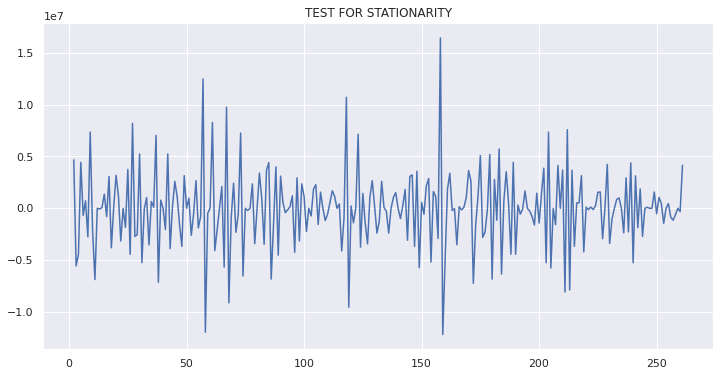

In [ ]:
# using the differencing method, we make this stationary

year_2012['diff'] = year_2012['price'] - year_2012['price'].shift(1) #.... Deduct the first data point from the previous data point
year_2012.dropna(inplace = True) # ....................................... Differencing returns a null value at first row, drop it
display(year_2012.head(5))

# PLOT THE DATA
plt.figure(figsize = (12, 6))
plt.plot(year_2012['diff'])
plt.title("TEST FOR STATIONARITY")

In [ ]:
# Install the necessary dependencies for the time series modelling

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<hr>
The autocorrelation function (ACF) and partial autocorrelation function (PACF) are used to determine the appropriate values for the p, d, and q parameters when fitting an ARIMA model to a time series. These parameters are used to specify the order of the autoregressive (p), differencing (d), and moving average (q) components of the model.

ACF and PACF plots are used to determine the appropriate values for p and q. The ACF plot shows the correlation between a time series and its lags, while the PACF plot shows the correlation between a time series and its lags after the effects of any intermediate lags have been removed.

To determine the appropriate value for p, look at the PACF plot and identify the lag at which the correlation drops to zero for the first time. The lag at which this occurs is the appropriate value for p.

To determine the appropriate value for q, look at the ACF plot and identify the lag at which the correlation drops to zero for the first time. The lag at which this occurs is the appropriate value for q.

To determine the appropriate value for d, look at the original time series plot and identify if there is a trend or seasonality. If there is trend, d = 1, if there is seasonality and no trend, d = 0.

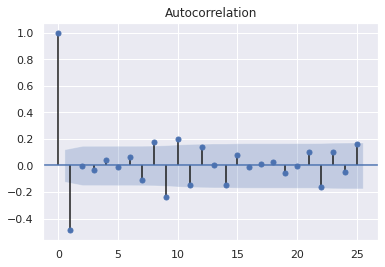

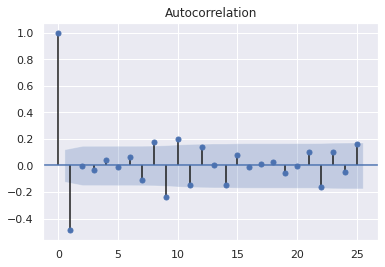

In [ ]:
plot_acf(year_2012['diff'][1:])

In [ ]:
# Determining lag value for our time series model by looping through possible numbers. This method is called GRID SEARCH
import warnings
warnings.simplefilter('ignore') # ............................................... Suppress python warnings

# Create a grid search of possible values of p,d,and q values
p_values = range(0, 5)
d_values = range(0, 2)
q_values = range(0, 4)
# p = d = q = range(2,6)

# Create a list to store the best AIC values and the corresponding p, d, and q values
best_aic = np.inf
best_pdq = None

# Loop through all possible combinations of p, d, and q values
for p in p_values:
    for d in d_values:
        for q in q_values:
            # Fit the ARIMA model
            model = ARIMA(year_2012['diff'], order=(p, d, q))
            try:
                model_fit = model.fit()
                # Update the best AIC value and the corresponding p, d, and q values if the current AIC value is lower
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_pdq = (p, d, q)
            except:
                continue

print("Best p,d,q: ", best_pdq)

Best p,d,q:  (0, 1, 2)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(year_2012['diff'], order=(1, 0 ,6)) # ......................... Define the model
arima_model = model.fit()

print(arima_model.summary()) # .................................................... Print summary

# Make Predictions
# predictions = model_fit.predict(start=len(year_2012['diff']), end=len(year_2012['diff'])+10, typ='levels')
# print(predictions)


In [ ]:
# Plot the actual and the forecasted data on a line chart to see the predictions of the model
year_2012['model_values'] = arima_model.fittedvalues
preds = year_2012['model_values'].append(predictions)
preds

In [ ]:
import plotly.graph_objects as go

# Calculate MAE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotARIMA(dataset, model, n_steps):
    data = pd.DataFrame(dataset)
    data.columns = ['actual']
    data['model'] = model.fittedvalues
    
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.model.append(forecast)
    # error = mean_absolute_percentage_error(data['actual'][s+d:], data['model'][s+d:])

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=data.index,
            y=data["actual"],
            name="Actual",
        ))
    fig.add_trace(
        go.Scatter(
            x=forecast.index,
            y=forecast,
            name="Model",
    ))
    fig.add_vrect(
    x0=data.index[-1], x1=forecast.index[-1],
    fillcolor="Lightsalmon", opacity=0.5,
    layer="below", line_width=0)
    
    # fig.update_layout(
    #     # title=f"Mean Absolute Percentage Error: {error:.2f}%",
    #     xaxis_title="weeks",
    #     yaxis_title="sales",
    #     yaxis_tickprefix = '$',
    #     font=dict(
    #         family="Courier New, monospace",
    #         size=18,
    #         color="RebeccaPurple"
    #     ))
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()
    
plotARIMA(year_2012['diff'], arima_model, 26)

Extra reading: https://analyticsindiamag.com/how-to-make-a-time-series-stationary/ <br>
Extra reading: https://medium.datadriveninvestor.com/interpreting-results-of-dicky-fuller-test-for-time-series-analysis-4bb1e98f242b

In [ ]:
# year_2012['models'] = arima_model.fittedvalues
# preds = model_fit.predict(start=len(year_2012['diff']), end=len(year_2012['diff'])+30, typ='levels')
# v = year_2012['models'].append(preds)
# plt.figure(figsize = (15, 8))
# plt.plot(v)